Based on https://husson.github.io/img/transp_plan_con4.pdf
# Imports

In [41]:
# install.packages("rsm")
library(rsm)

Installing package into 'C:/Users/luism/Documents/R/win-library/3.5'
(as 'lib' is unspecified)

Warning message:
"package 'rsm' is in use and will not be installed"


# Central composite design

In [42]:
plan <- ccd(2)

In [43]:
plan

run.order,std.order,x1,x2,Block
<int>,<int>,<dbl>,<dbl>,<fct>
1,6,0.000000,0.000000,1
2,2,1.000000,-1.000000,1
3,1,-1.000000,-1.000000,1
4,8,0.000000,0.000000,1
5,5,0.000000,0.000000,1
6,4,1.000000,1.000000,1
7,3,-1.000000,1.000000,1
8,7,0.000000,0.000000,1
1,4,0.000000,1.414214,2


In [44]:
X <- model.matrix(~x1+x2+I(x1^2)+I(x2^2)+I(x1*x2), data=plan)

In [45]:
t(X)%*%X

,(Intercept),x1,x2,I(x1^2),I(x2^2),I(x1 * x2)
(Intercept),16,0,0,8,8,0
x1,0,8,0,0,0,0
x2,0,0,8,0,0,0
I(x1^2),8,0,0,12,4,0
I(x2^2),8,0,0,4,12,0
I(x1 * x2),0,0,0,0,0,4


In [46]:
solve(t(X)%*%X)

,(Intercept),x1,x2,I(x1^2),I(x2^2),I(x1 * x2)
(Intercept),0.1250,0.000,0.000,-0.0625,-0.0625,0.00
x1,0.0000,0.125,0.000,0.0000,0.0000,0.00
x2,0.0000,0.000,0.125,0.0000,0.0000,0.00
I(x1^2),-0.0625,0.000,0.000,0.1250,0.0000,0.00
I(x2^2),-0.0625,0.000,0.000,0.0000,0.1250,0.00
I(x1 * x2),0.0000,0.000,0.000,0.0000,0.0000,0.25


In [47]:
set.seed(1234)
Y <- c(1,5,4,7,8,8,4,5,2,5,4,5,5,9,7,5)
CR.rsm <- rsm(Y~SO(x1, x2), data=plan)
summary(CR.rsm)


Call:
rsm(formula = Y ~ SO(x1, x2), data = plan)

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  5.50000    0.86821  6.3349 8.516e-05 ***
x1           0.62500    0.86821  0.7199    0.4881    
x2          -0.50888    0.86821 -0.5861    0.5708    
x1:x2        0.75000    1.22784  0.6108    0.5549    
x1^2        -0.12500    0.86821 -0.1440    0.8884    
x2^2        -0.37500    0.86821 -0.4319    0.6750    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Multiple R-squared:  0.126,	Adjusted R-squared:  -0.3109 
F-statistic: 0.2884 on 5 and 10 DF,  p-value: 0.9088

Analysis of Variance Table

Response: Y
            Df Sum Sq Mean Sq F value Pr(>F)
FO(x1, x2)   2  5.197  2.5983  0.4309 0.6615
TWI(x1, x2)  1  2.250  2.2500  0.3731 0.5549
PQ(x1, x2)   2  1.250  0.6250  0.1036 0.9025
Residuals   10 60.303  6.0303               
Lack of fit  3 16.303  5.4344  0.8646 0.5028
Pure error   7 44.000  6.2857               

Stationary point of response surfac

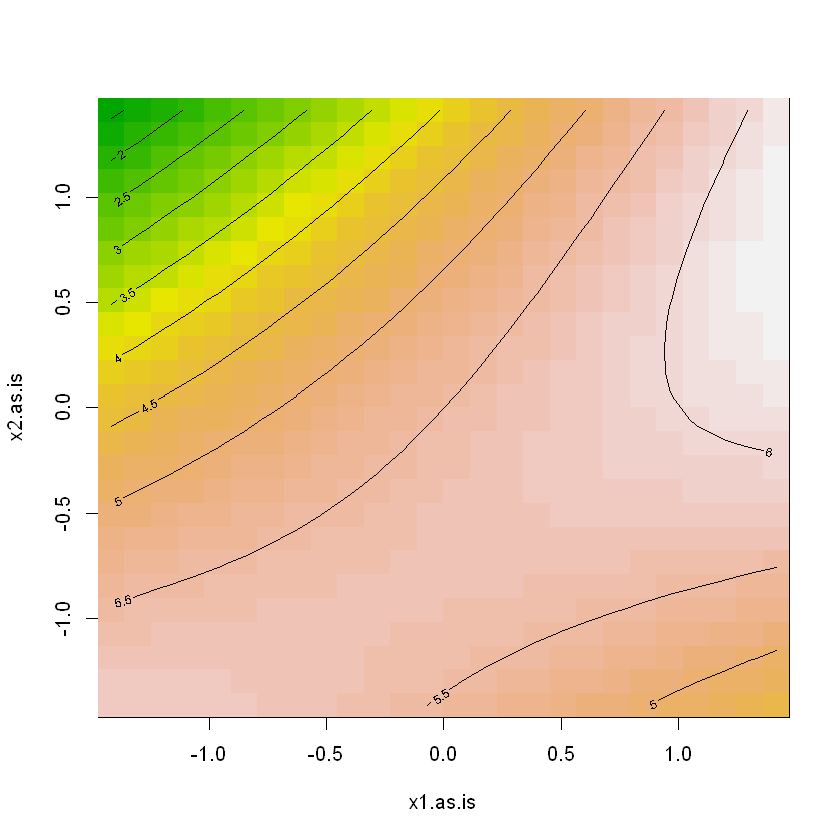

In [48]:
contour(CR.rsm, ~x1+x2, image=TRUE)

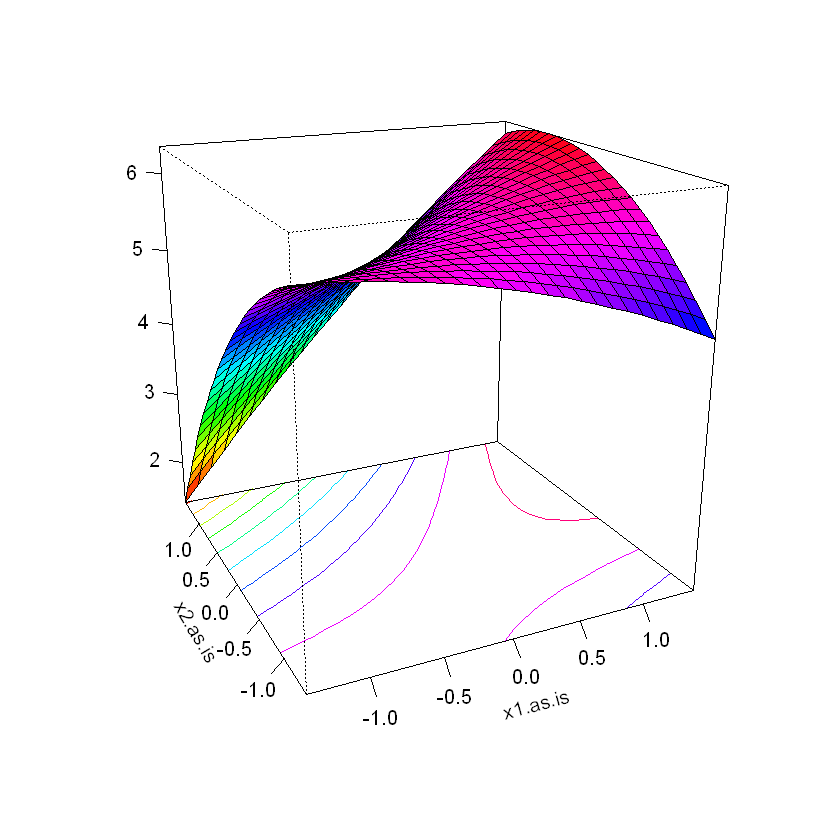

In [49]:
persp(CR.rsm, ~x1+x2, col=rainbow(50), contours="colors")

# Box-Benhken design

In [50]:
benhken <- bbd(3)

In [51]:
benhken

,run.order,std.order,x1,x2,x3
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,7,-1,0,1
2,2,1,-1,-1,0
3,3,8,1,0,1
4,4,10,0,1,-1
5,5,11,0,-1,1
6,6,9,0,-1,-1
7,7,16,0,0,0
8,8,6,1,0,-1
9,9,3,-1,1,0
